# INSURANCE DATASET
 Using the insurance Dataset to carry out kmeans clustering to group the policy holders to get a better understanding of the influencing factors.

## BUSINESS OBJECTIVE
* Maximize Profits
* Identify Customer Segments
* Maximize Quality of Service
* Minimize Risk
* Identify influencing factors

## CONSTRAINTS
* Natural Calamity or Accidents
* Crime rate


## DATA DICTIONARY

| **slno** | **Name of Feature** | **Description**                                         | **Type** | **Relevance** |
|:--------:|:--------------------|:--------------------------------------------------------|:--------:|:-------------:|
| 1        | Premiums Paid       | Premium Paid by the customer                            | Ratio    | Relevant      |
| 2        | Age                 | Age of the customer                                     | Ratio    | Relevant      |
| 3        | Days to Renew       | Days to renew the insurance                             | Ratio    | Relevant      |
| 4        | Claims made         | Claims made by the customers                            | Ratio    | Relevant      |
| 5        | Income              | Income of the customers                                 | Ratio    | Relevant      |

Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from feature_engine.outliers import Winsorizer
from termcolor import colored

Loading the dataset using the pandas library and confirming the dataset has been loaded properly using the 'head' function

In [2]:

df0 = pd.read_csv(r"D:\360Digitmg\ASSIGNMENTS\Ass7\Insurance Dataset.csv")
df=df0.copy()
df.head()

,Premiums Paid,Age,Days to Renew,Claims made,Income
0,2800,26,233,3890.076336,28000
1,2950,27,130,2294.444444,29500
2,3100,28,144,2564.545455,31000
3,3250,30,65,1978.260870,32500
4,3400,32,56,2009.090909,34000


### EXPLORATORY DATA ANALYSIS

The below three lines give a general idea about the dataset like the shape, type and non null values.

In [3]:
df.shape

(100, 5)

In [4]:
df.dtypes

Premiums Paid      int64
Age                int64
Days to Renew      int64
Claims made      float64
Income             int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Premiums Paid  100 non-null    int64  
 1   Age            100 non-null    int64  
 2   Days to Renew  100 non-null    int64  
 3   Claims made    100 non-null    float64
 4   Income         100 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 4.0 KB


The describe function gives the count, min, max, mean, standard deviation and quantile values of the dataset.

In [6]:
df.describe()

,Premiums Paid,Age,Days to Renew,Claims made,Income
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,12542.250000,46.110000,120.400000,12578.993367,102250.000000
std,6790.731666,13.887641,88.055767,13695.906762,43517.237964
min,2800.000000,23.000000,1.000000,1978.260870,28000.000000
25%,6975.000000,34.000000,56.000000,5220.648735,65125.000000
50%,11825.000000,45.000000,89.000000,8386.043907,102250.000000
75%,15475.000000,54.500000,186.500000,14670.889520,139375.000000
max,29900.000000,82.000000,321.000000,99676.744190,176500.000000


Checking the Number of Duplicates in the Dataset.

In [7]:
duplicate_values=df.duplicated(subset=None,keep='first').sum()
print(colored(' Number of Duplicate values: ','blue',attrs=['bold']),duplicate_values)

 Number of Duplicate values:  0


Checking the Number and Percentage of Missing Values in the Dataset.

In [8]:
missing=df.isna().sum().sort_values(ascending=False)
print(colored("Number of Missing Values\n\n",'blue',attrs=['bold']),missing)

Number of Missing Values

 Premiums Paid    0
Age              0
Days to Renew    0
Claims made      0
Income           0
dtype: int64


In [9]:
print(colored('Number of Unique Values:\n\n','blue',attrs=['bold']),df.nunique())

Number of Unique Values:

 Premiums Paid    100
Age               31
Days to Renew     33
Claims made      100
Income           100
dtype: int64


### First Moment Business Decision or Measures of Central Tendency.
* It gives the mean, median and mode values of the dataset.
* Mean is the average of the data and it easily gets influenced by the outliers.
* Median is the middle most value of the dataset.
* Mode is the most repeated value of the dataset.
* If the mean, median & mode are same then the data has normal distribution otherwise the distribution is not normal.

In [10]:
df.mean()

Premiums Paid     12542.250000
Age                  46.110000
Days to Renew       120.400000
Claims made       12578.993367
Income           102250.000000
dtype: float64

In [11]:
df.median()

Premiums Paid     11825.000000
Age                  45.000000
Days to Renew        89.000000
Claims made        8386.043907
Income           102250.000000
dtype: float64

In [12]:
stats.mode(df)

ModeResult(mode=array([[ 2800.     ,    45.     ,    48.     ,  1978.26087, 28000.     ]]), count=array([[1, 8, 6, 1, 1]]))

### Second Moment Business Decision or Measures of Dispersion
* It contains Variance, Standard Deviation & Range.
* It gives a general idea about the spread of data in the dataset.
* Variance is the average squared distance of each data point from the mean.
* Standard deviation is the root of the variance.
* Range is the difference between the max and min data point of the dataset.

In [13]:
df.var()

Premiums Paid    4.611404e+07
Age              1.928666e+02
Days to Renew    7.753818e+03
Claims made      1.875779e+08
Income           1.893750e+09
dtype: float64

In [14]:
df.std()

Premiums Paid     6790.731666
Age                 13.887641
Days to Renew       88.055767
Claims made      13695.906762
Income           43517.237964
dtype: float64

In [15]:
Range=df.max()-df.min()
Range

Premiums Paid     27100.00000
Age                  59.00000
Days to Renew       320.00000
Claims made       97698.48332
Income           148500.00000
dtype: float64

### THIRD MOMENT BUSINESS DECISION OR SKEWNESS
* Skewness gives the measure of asymmetry in a data.
* The types of skewness are as follows:
    * Negative skewness or left skewed.
    * Positive skewness or right skewed.
    * If skewness = 0 then it is normally distributed.

In [16]:
df.skew()

Premiums Paid    0.767263
Age              0.439698
Days to Renew    0.670326
Claims made      3.551233
Income           0.000000
dtype: float64

### FOURTH MOMENT BUSINESS DECISION OR KURTOSIS
* Kurtosis is the peakedness of the distribution.
* Negative kurtosis implies a wider peak and thinner tails.
* Positive kurtosis implies a narrow peak and wider tails.

In [17]:
df.kurt()

Premiums Paid    -0.134543
Age              -0.287800
Days to Renew    -0.786621
Claims made      17.254497
Income           -1.200000
dtype: float64

### GRAPHICAL REPRESENTATION

Plotting histograms of each variable.

C:\Users\lenny\AppData\Local\Temp\ipykernel_26840\522995607.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


<function matplotlib.pyplot.show(close=None, block=None)>

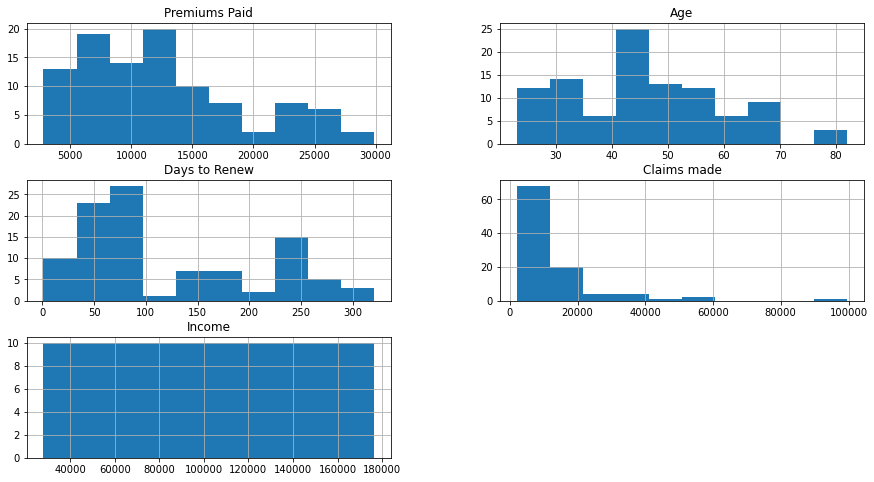

In [18]:
fig=plt.figure(figsize=(15,8))
ax=fig.gca()
df.hist(ax=ax)
plt.show

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


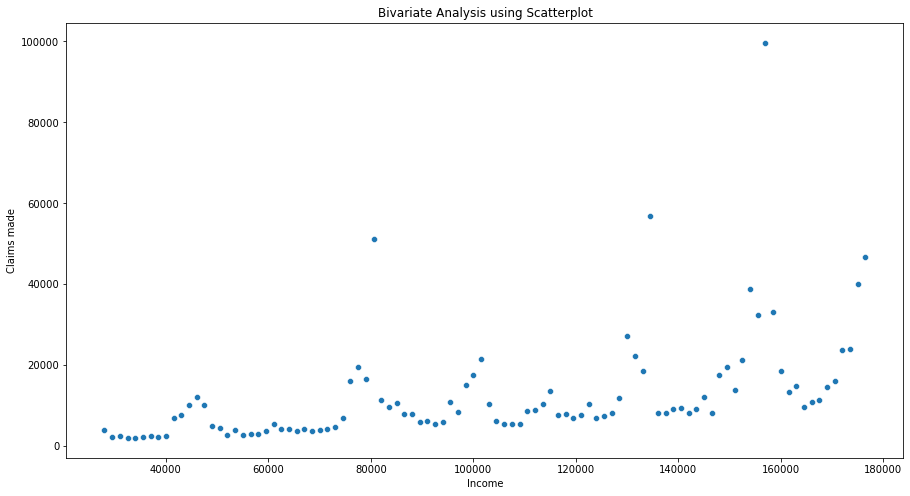

In [19]:
plt.figure(figsize=(15,8))
sns.scatterplot(df.Income,df['Claims made'])
plt.title("Bivariate Analysis using Scatterplot")
plt.show()

Plotting boxplots of each variable.

In [20]:
df.columns

Index(['Premiums Paid', 'Age', 'Days to Renew', 'Claims made', 'Income'], dtype='object')

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Premiums Paid'>

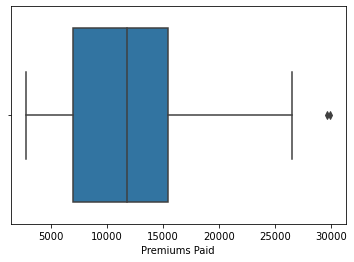

In [21]:
sns.boxplot(df["Premiums Paid"])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Days to Renew'>

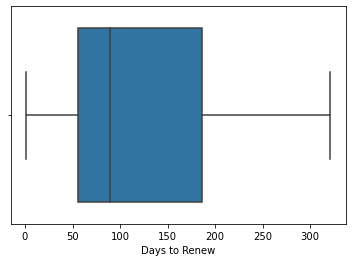

In [22]:
sns.boxplot(df['Days to Renew'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Claims made'>

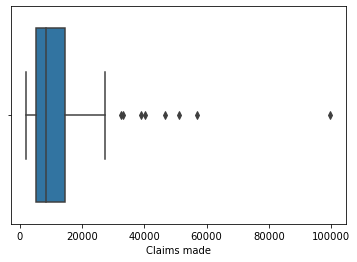

In [23]:
sns.boxplot(df['Claims made'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

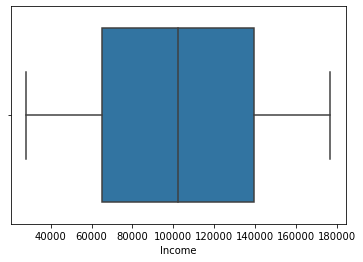

In [24]:
sns.boxplot(df['Income'])

From the boxplots it is very evident that there are outliers in the dataset so using the below custom function calculated the number of outliers in each variable.

In [25]:
#Defining a custom function to get the number of outliers present as doing the steps again would just add extra lines 
def outlier_func(i):
    x=i.quantile(0.25)-((i.quantile(0.75)-i.quantile(0.25))*1.5)
    y=i.quantile(0.75)+((i.quantile(0.75)-i.quantile(0.25))*1.5)
    outliers= np.where(i > y, True, np.where(i < x, True, False))
    return(outliers)

In [26]:
sum(outlier_func(df["Premiums Paid"]))

2

In [27]:
sum(outlier_func(df["Claims made"]))

8

Using winsorization to rectify the outliers to avoid data lose.The module used for Winsorization is feature_engine

In [28]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=["Premiums Paid"])

df["Premiums Paid"]= winsor.fit_transform(df[["Premiums Paid"]])
sum(outlier_func(df["Premiums Paid"]))

0

In [29]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=["Claims made"])

df["Claims made"]= winsor.fit_transform(df[["Claims made"]])
sum(outlier_func(df["Claims made"]))

0

Again plotting boxplots to show the difference in the boxplots after rectifying the outliers.

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Premiums Paid'>

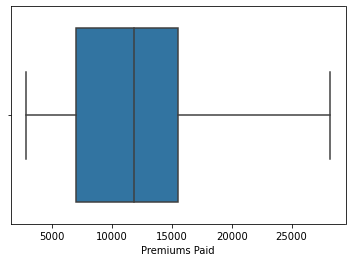

In [30]:
sns.boxplot(df['Premiums Paid'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Claims made'>

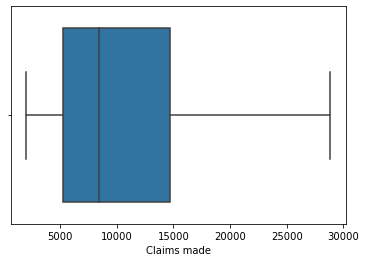

In [31]:
sns.boxplot(df['Claims made'])

## NORMALIZATION
Before clustering the data is scaled using normalization 

Using the MinMaxScaler from sklearn.preprocessing library we do normalization and from the descriptive statistics we can see that the values are between 0 and 1.

In [32]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
df_minmax=pd.DataFrame(minmax.fit_transform(df),columns=df.columns,index=df.index)
df_minmax.head(2)

,Premiums Paid,Age,Days to Renew,Claims made,Income
0,0.0000,0.050847,0.725000,0.071156,0.000000
1,0.0059,0.067797,0.403125,0.011768,0.010101


In [33]:
df_minmax.describe()

,Premiums Paid,Age,Days to Renew,Claims made,Income
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.381976,0.391695,0.373125,0.331933,0.500000
std,0.264134,0.235384,0.275174,0.288089,0.293045
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.164208,0.186441,0.171875,0.120678,0.250000
50%,0.354966,0.372881,0.275000,0.238491,0.500000
75%,0.498525,0.533898,0.579687,0.472407,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000


### SCREE PLOT
Creating the Scree plot to get an idea about the number of clusters to choose for Kmeans Clustering.

In [34]:
from sklearn.cluster import KMeans
TWSS=[]
k=list(range(2,9))
for i in k:
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(df_minmax)
    TWSS.append(kmeans.inertia_)
TWSS

[21.370955440747995,
 15.781255399942342,
 12.04988528920737,
 9.751890760469461,
 8.101284801872286,
 7.195439296216091,
 6.3841563238095524]

Text(0, 0.5, 'Total within SS')

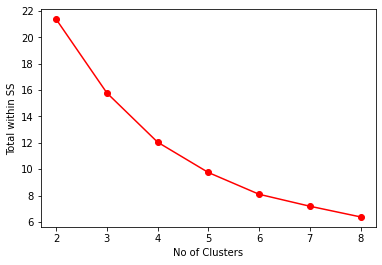

In [35]:
plt.plot(k,TWSS,'ro-');plt.xlabel("No of Clusters"); plt.ylabel("Total within SS")

From the scree plot 3 number of clusters seem to be the most optimum number for kmeans clustering.

### NO OF CLUSTERS : 3

In [36]:
model=KMeans(n_clusters=3)
model.fit(df_minmax)
model.labels_
mb=pd.Series(model.labels_)
df_minmax3= df.copy()
df_minmax3['clust']=mb
df_minmax3.head(3)

,Premiums Paid,Age,Days to Renew,Claims made,Income,clust
0,2800.0,26,233,3890.076336,28000,1
1,2950.0,27,130,2294.444444,29500,1
2,3100.0,28,144,2564.545455,31000,1


In [37]:
df_minmax3.groupby(['clust']).count()

,Premiums Paid,Age,Days to Renew,Claims made,Income
clust,,,,,
0,20,20,20,20,20
1,49,49,49,49,49
2,31,31,31,31,31


In [38]:
df_minmax3.groupby(['clust']).mean()

,Premiums Paid,Age,Days to Renew,Claims made,Income
clust,,,,,
0,17495.000000,51.400000,249.400000,23702.254191,130825.000000
1,7424.489796,40.428571,96.775510,5525.620848,67275.510204
2,17337.903226,51.677419,74.516129,11124.629046,139096.774194


Text(0, 0.5, 'Claims made')

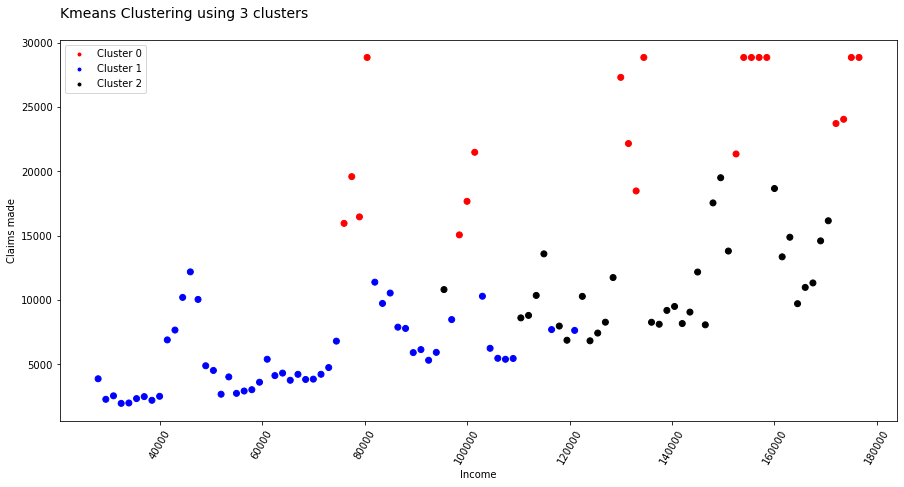

In [39]:
plt.figure(figsize=(15,7))
a4 = df_minmax3.clust.map({0:'red', 1:'blue', 2:'black'})
plt.scatter(df_minmax3['Income'],df_minmax3['Claims made'], c=a4)

from matplotlib.lines import Line2D
colors=['red','blue','black']
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]

plt.legend(handles=legend_elements, loc='upper left')
plt.title('Kmeans Clustering using 3 clusters\n', loc='left', fontsize=14)
plt.xticks(rotation=60)
plt.xlabel('Income')
plt.ylabel('Claims made')

#### INSIGHTS
* Cluster 0 : This group has highest income , premium and claims and has the oldest population of customers
* Cluster 1 : This group has low income, premium and claims and has the youngest population
* Cluster 2 : This group has a higher income and premium but the claims are low . It has the middle most aged customers

### NO OF CLUSTERS : 4

In [40]:
model=KMeans(n_clusters=4)
model.fit(df_minmax)
model.labels_
mb=pd.Series(model.labels_)
df_minmax4= df.copy()
df_minmax4['clust']=mb
df_minmax4.head(3)

,Premiums Paid,Age,Days to Renew,Claims made,Income,clust
0,2800.0,26,233,3890.076336,28000,0
1,2950.0,27,130,2294.444444,29500,0
2,3100.0,28,144,2564.545455,31000,0


In [41]:
df_minmax4.groupby(['clust']).count()

,Premiums Paid,Age,Days to Renew,Claims made,Income
clust,,,,,
0,28,28,28,28,28
1,39,39,39,39,39
2,15,15,15,15,15
3,18,18,18,18,18


In [42]:
df_minmax4.groupby(['clust']).mean()

,Premiums Paid,Age,Days to Renew,Claims made,Income
clust,,,,,
0,5579.464286,38.464286,79.750000,3683.967613,52107.142857
1,13247.435897,43.487179,76.538462,8589.957105,119115.384615
2,9988.333333,48.200000,257.733333,17071.821643,85000.000000
3,23804.166667,61.944444,164.222222,21968.181160,158083.333333


Text(0, 0.5, 'Claims made')

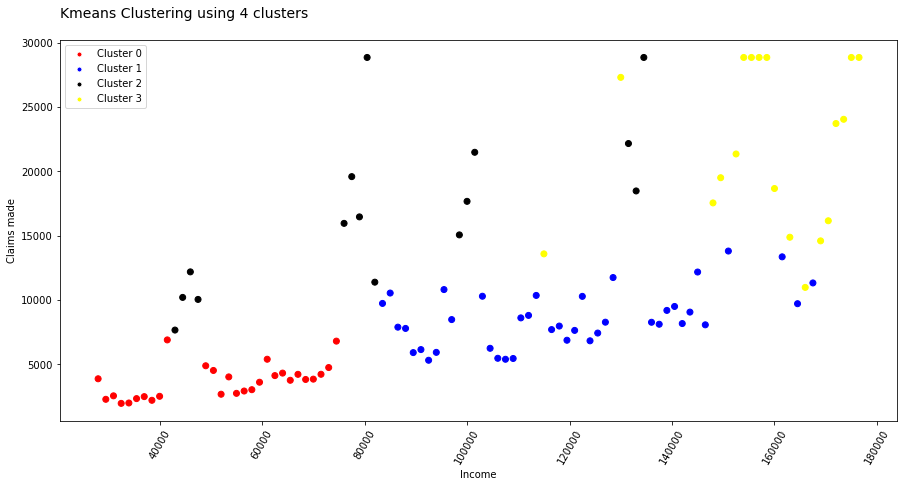

In [43]:
plt.figure(figsize=(15,7))
a4 = df_minmax4.clust.map({0:'red', 1:'blue', 2:'black',3:'yellow'})
plt.scatter(df_minmax4['Income'],df_minmax4['Claims made'], c=a4)

from matplotlib.lines import Line2D
colors=['red','blue','black','yellow']
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]

plt.legend(handles=legend_elements, loc='upper left')
plt.title('Kmeans Clustering using 4 clusters\n', loc='left', fontsize=14)
plt.xticks(rotation=60)
plt.xlabel('Income')
plt.ylabel('Claims made')

#### INSIGHTS
* Cluster 0 : This group has lowest income, premium and claims and has the youngest population
* Cluster 1 : This group has a higher income and premium but the claims are low . It has comparatively young customers
* Cluster 2 : This group has a lower income and premium but the claims are high. It has the second oldest customers.
* Cluster 3 : This group has highest income , premium and claims and has the oldest population of customers

## STANDARDIZATION
Using standardization to carry out the scaling of the data to generalize the data.

In [44]:
from sklearn.preprocessing import StandardScaler
stdscaled=StandardScaler()
df_stdscaled=pd.DataFrame(stdscaled.fit_transform(df),columns=df.columns,index=df.index)
df_stdscaled.head(2)

,Premiums Paid,Age,Days to Renew,Claims made,Income
0,-1.453432,-1.455345,1.285177,-0.909759,-1.714816
1,-1.430984,-1.382976,0.109571,-1.116941,-1.680173


In [45]:
df_stdscaled.describe()

,Premiums Paid,Age,Days to Renew,Claims made,Income
count,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,0.000000,2.164935e-17,-7.993606e-17,-2.664535e-17,6.217249e-17
std,1.005038,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00
min,-1.453432,-1.672453e+00,-1.362790e+00,-1.157996e+00,-1.714816e+00
25%,-0.828614,-8.763913e-01,-7.350391e-01,-7.369921e-01,-8.574080e-01
50%,-0.102777,-8.032984e-02,-3.583886e-01,-3.259853e-01,0.000000e+00
75%,0.443471,6.071778e-01,7.544423e-01,4.900628e-01,8.574080e-01
max,2.351599,2.597332e+00,2.289578e+00,2.330645e+00,1.714816e+00


### SCREE PLOT
Creating the Scree plot to get an idea about the number of clusters to choose for Kmeans Clustering.

In [46]:
from sklearn.cluster import KMeans
TWSS=[]
k=list(range(2,9))
for i in k:
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(df_stdscaled)
    TWSS.append(kmeans.inertia_)
TWSS

[297.5193117064256,
 229.38913079737415,
 173.75255477105972,
 142.05963977412947,
 112.78517252866585,
 101.45530598179211,
 91.5704511662616]

Text(0, 0.5, 'Total within SS')

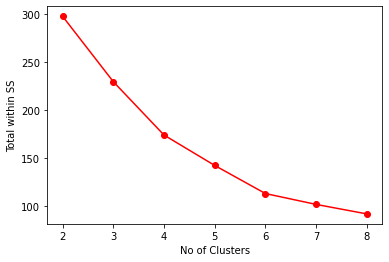

In [47]:
plt.plot(k,TWSS,'ro-');plt.xlabel("No of Clusters"); plt.ylabel("Total within SS")

From the scree plot 3 number of clusters seem to be the most optimum number for kmeans clustering.

### NO OF CLUSTERS : 3

In [48]:
model=KMeans(n_clusters=3)
model.fit(df_stdscaled)
model.labels_
mb=pd.Series(model.labels_)
df_stdscaled3= df.copy()
df_stdscaled3['clust']=mb
df_stdscaled3.head(3)

,Premiums Paid,Age,Days to Renew,Claims made,Income,clust
0,2800.0,26,233,3890.076336,28000,0
1,2950.0,27,130,2294.444444,29500,0
2,3100.0,28,144,2564.545455,31000,0


In [49]:
df_stdscaled3.groupby(['clust']).count()

,Premiums Paid,Age,Days to Renew,Claims made,Income
clust,,,,,
0,46,46,46,46,46
1,19,19,19,19,19
2,35,35,35,35,35


In [50]:
df_stdscaled3.groupby(['clust']).mean()

,Premiums Paid,Age,Days to Renew,Claims made,Income
clust,,,,,
0,7134.782609,39.565217,106.869565,5688.472515,64880.434783
1,17897.368421,52.684211,249.631579,24156.861997,132526.315789
2,16655.000000,51.142857,68.028571,10543.254061,134928.571429


Text(0, 0.5, 'Claims made')

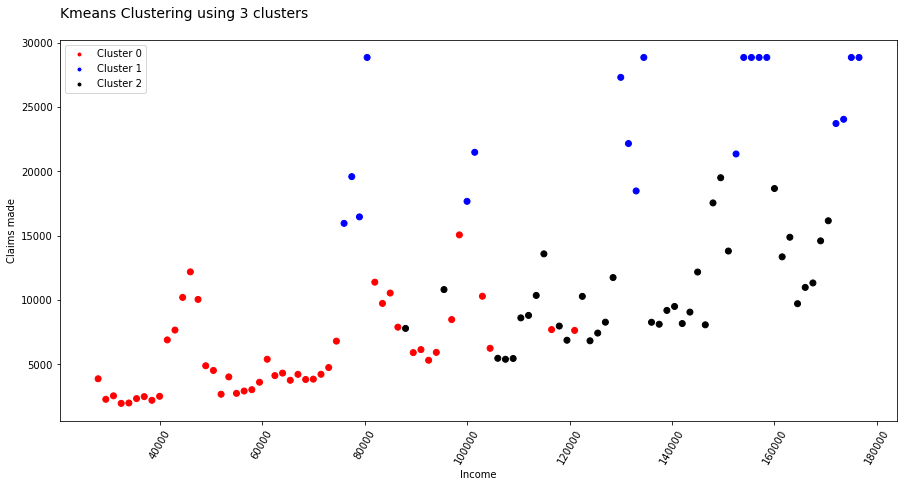

In [51]:
plt.figure(figsize=(15,7))
a4 = df_stdscaled3.clust.map({0:'red', 1:'blue', 2:'black'})
plt.scatter(df_stdscaled3['Income'],df_stdscaled3['Claims made'], c=a4)

from matplotlib.lines import Line2D
colors=['red','blue','black']
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]

plt.legend(handles=legend_elements, loc='upper left')
plt.title('Kmeans Clustering using 3 clusters\n', loc='left', fontsize=14)
plt.xticks(rotation=60)
plt.xticks(rotation=60)
plt.xlabel('Income')
plt.ylabel('Claims made')

#### INSIGHTS
* Cluster 0 : This group has highest income , premium and claims and has the oldest population of customers
* Cluster 1 : This group has low income, premium and claims and has the youngest population
* Cluster 2 : This group has a higher income and premium but the claims are low . It has the middle most aged customers

### NO OF CLUSTERS : 4

In [52]:
model=KMeans(n_clusters=4)
model.fit(df_stdscaled)
model.labels_
mb=pd.Series(model.labels_)
df_stdscaled4= df.copy()
df_stdscaled4['clust']=mb
df_stdscaled4.head(3)

,Premiums Paid,Age,Days to Renew,Claims made,Income,clust
0,2800.0,26,233,3890.076336,28000,1
1,2950.0,27,130,2294.444444,29500,1
2,3100.0,28,144,2564.545455,31000,1


In [53]:
df_stdscaled4.groupby(['clust']).count()

,Premiums Paid,Age,Days to Renew,Claims made,Income
clust,,,,,
0,16,16,16,16,16
1,29,29,29,29,29
2,37,37,37,37,37
3,18,18,18,18,18


In [54]:
df_stdscaled4.groupby(['clust']).mean()

,Premiums Paid,Age,Days to Renew,Claims made,Income
clust,,,,,
0,9753.125000,48.687500,254.125000,16436.597272,82281.250000
1,5954.310345,36.896552,77.724138,3883.730605,55206.896552
2,13350.675676,44.513514,74.702703,8611.432459,120594.594595
3,23804.166667,61.944444,164.222222,21968.181160,158083.333333


Text(0, 0.5, 'Claims made')

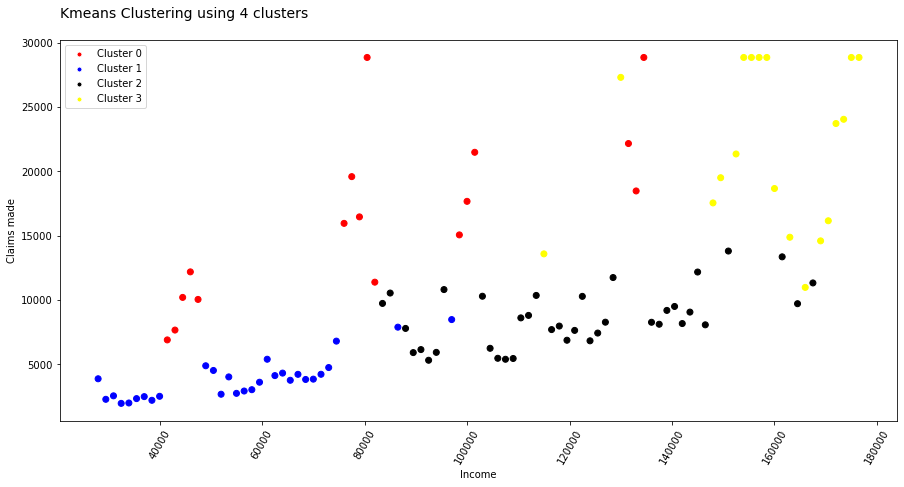

In [55]:
plt.figure(figsize=(15,7))
a4 = df_stdscaled4.clust.map({0:'red', 1:'blue', 2:'black',3:'yellow'})
plt.scatter(df_stdscaled4['Income'],df_stdscaled4['Claims made'], c=a4)

from matplotlib.lines import Line2D
colors=['red','blue','black','yellow']
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]

plt.legend(handles=legend_elements, loc='upper left')
plt.title('Kmeans Clustering using 4 clusters\n', loc='left', fontsize=14)
plt.xticks(rotation=60)
plt.xlabel('Income')
plt.ylabel('Claims made')

#### INSIGHTS
* Cluster 0 : This group has a lower income and premium but the claims are high. It has the second oldest customers.
* Cluster 1 : This group has lowest income, premium and claims and has the youngest population
* Cluster 2 : This group has a higher income and premium but the claims are low . It has comparatively young customers.
* Cluster 3 : This group has highest income , premium and claims and has the oldest population of customers

## CONCLUSION
From the above insights we can group the customers into the following groups:
* __High Income and High Claim__ : This group is a high risk group as the claims made are more than the premium and most of customers are very old

* __High Income and Low Claim__ : This group is the second oldest although it is a high income and high premium group but the claims are low.

* __Low Income and High Claim__ : This group is a comparatively younger group it also has low income and premium but the claims are high.

* __Low Income and Low Claim__ : This group consists of younger customers and it has  low income,  premium and claim.

### BENEFIT
* From the above analysis of the segments we can clearly see where there has to be a more efforts to retain low claim and high income groups
* Age and income are the influencing factor 